**TASK 4**

AUTHOR : SOWMIYA S

Objective: To analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Importing the Given Dataset

cols=['TweetID', 'Topic', 'Target', 'Text']

training = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/twitter_training.csv', names = cols)

validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/twitter_validation.csv', names = cols)

training.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Data cleaning and exploratory data analysis (EDA)

In [ ]:
validation.head()

,TweetID,Topic,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


There are 891 observations across 5 variables.

In [ ]:
dataset = pd.concat([training, validation], ignore_index = False)
dataset.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


These are the columns(Variables) in the dataset.

In [ ]:
dataset.describe(include = 'object')  # Describe() but for categorical/textual data

,Topic,Target,Text
count,75682,75682,74996
unique,32,4,69974
top,TomClancysRainbowSix,Negative,
freq,2435,22808,172


In [ ]:
dataset['Topic'].value_counts()

Topic
TomClancysRainbowSix                 2435
LeagueOfLegends                      2431
MaddenNFL                            2429
Microsoft                            2428
CallOfDuty                           2425
Verizon                              2414
ApexLegends                          2412
Facebook                             2403
CallOfDutyBlackopsColdWar            2403
WorldOfCraft                         2394
Dota2                                2391
FIFA                                 2378
NBA2K                                2373
Battlefield                          2372
TomClancysGhostRecon                 2368
johnson&johnson                      2367
Overwatch                            2366
Xbox(Xseries)                        2360
Amazon                               2350
PlayStation5(PS5)                    2343
GrandTheftAuto(GTA)                  2339
CS-GO                                2336
Cyberpunk2077                        2334
Nvidia                      

<Axes: xlabel='Topic'>

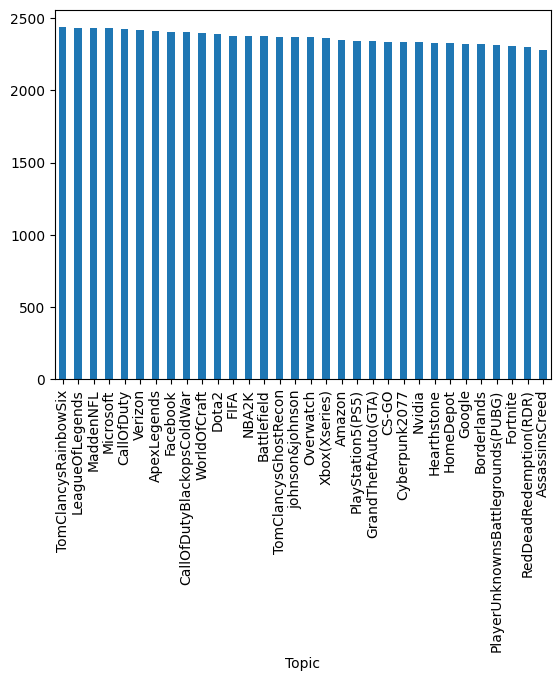

In [ ]:
dataset['Topic'].value_counts().plot(kind = 'bar')

In [ ]:
dataset.isna().sum()

TweetID      0
Topic        0
Target       0
Text       686
dtype: int64

In [ ]:
dataset.duplicated().sum()

3217

In [ ]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.isnull().sum()
dataset.duplicated().sum()

0

<Axes: xlabel='Target', ylabel='Topic'>

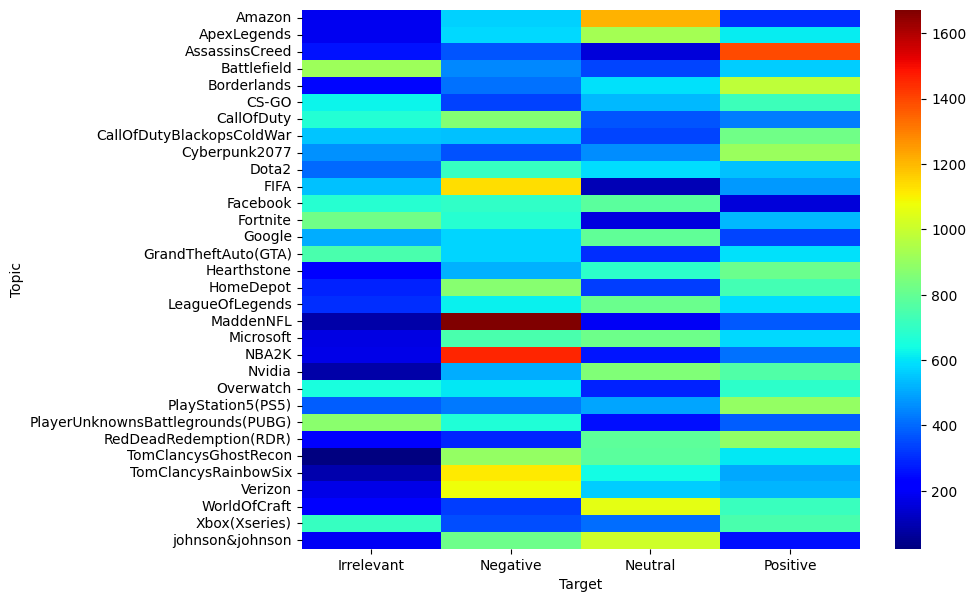

In [ ]:
plt.figure(figsize=(9, 7))
crosstab = pd.crosstab(index=dataset['Topic'], columns=dataset['Target'])
sns.heatmap(crosstab, cmap = 'jet')

In [ ]:
crosstab.head()

Target,Irrelevant,Negative,Neutral,Positive
Topic,,,,
Amazon,188,566,1210,306
ApexLegends,188,577,927,613
AssassinsCreed,257,366,155,1393
Battlefield,912,449,345,563
Borderlands,239,415,590,978


In [ ]:
dataset['Topic'].values

array(['Borderlands', 'Borderlands', 'Borderlands', ..., 'CallOfDuty',
       'GrandTheftAuto(GTA)', 'CS-GO'], dtype=object)

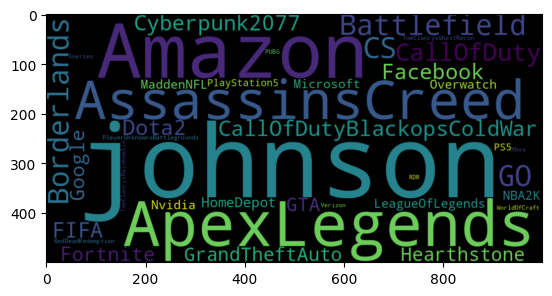

In [ ]:
from wordcloud import WordCloud

topic_list = ' '.join(crosstab.index)

wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

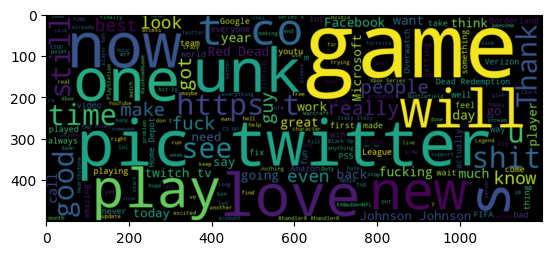

In [ ]:
corpus = ' '.join(dataset['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')

Cleaning and Modifying

In [ ]:
import re

In [ ]:
text = dataset['Text']
text.head()

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you ...
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: Text, dtype: object

In [ ]:
dataset['Text'] = dataset['Text'].astype(str) # Modify the Text col values to str only

In [ ]:
l = []
text = dataset['Text']

for t in text:
    if type(t) not in l:
        l.append(type(t))
print(l) # Checks the type of Text col

[<class 'str'>]


Tokenization and Pre Processing

In [ ]:
!pip3 install nltk --break-system-packages
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text[0], len(text), type(word_tokenize(text[0]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('im getting on borderlands and i will murder you all,', 1, list)

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
type(text[0])

str

In [ ]:
from nltk.tokenize import word_tokenize

modified_text = []

rows = len(text)

for ithText in dataset['Text']:

    ithText = ithText.lower()  # Make text lowercase
    ithText = re.sub(r'[^\w\s]', '', ithText) # Remove punctuations and commas
    ithText = re.sub(r'\d+', '', ithText)


    tokens = word_tokenize(ithText)  # Extract tokens of each word
    words = set(stopwords.words('english'))
    doc = [word for word in tokens if word not in words]
    finalText = ' '.join(doc)
    modified_text.append(finalText)  # ith doc contents are tokenized and stored back

print(modified_text[1:3])

['coming borders kill', 'im getting borderlands kill']


In [ ]:
dataset.drop('Text', axis =1 , inplace = True)
dataset.head()

,TweetID,Topic,Target
0,2401,Borderlands,Positive
1,2401,Borderlands,Positive
2,2401,Borderlands,Positive
3,2401,Borderlands,Positive
4,2401,Borderlands,Positive


In [ ]:
dataset['Text'] = modified_text
dataset.head()

,TweetID,Topic,Target,Text
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands murder


Building model

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset['Text']
y = dataset['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)


y_pred = rf_classifier.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9017188799556418


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.83      0.89      2514
    Negative       0.93      0.92      0.92      4364
     Neutral       0.91      0.89      0.90      3594
    Positive       0.84      0.94      0.89      3956

    accuracy                           0.90     14428
   macro avg       0.91      0.89      0.90     14428
weighted avg       0.91      0.90      0.90     14428

